In [ ]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

# Load dataset
df = pd.read_csv("spam.csv", encoding="latin-1") 
df = df[['v1', 'v2']]  
df.columns = ['label', 'message']  

In [ ]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
def clean_text(text):
    text = text.lower()  
    text = re.sub(f"[{string.punctuation}]", "", text)  
    text = re.sub(r"\d+", "", text)  
    text = re.sub(r"\s+", " ", text).strip()  
    return text

df['clean_message'] = df['message'].apply(clean_text)

In [ ]:
vectorizer = TfidfVectorizer(stop_words="english") 
X = vectorizer.fit_transform(df['clean_message'])  
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = nb.predict(X_test)

In [ ]:
# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
#Function to Predict if a new message is spam
def predict_spam(message):
    message = clean_text(message) 
    message_vector = vectorizer.transform([message])  
    return "Spam" if nb.predict(message_vector)[0] == 1 else "Not Spam"

In [ ]:
# Testing Spam Filter
test_messages = [
    "Congratulations! You've won a free iPhone. Click here to claim your prize.",
    "Hey, are we still meeting for coffee later?",
    "Urgent! Your bank account has been compromised. Send us your details now!",
    "Hi how are you? hope you are well"
]
for msg in test_messages:
    print(f"Message: '{msg}' → Prediction: {predict_spam(msg)}")

Message: 'Congratulations! You've won a free iPhone. Click here to claim your prize.' → Prediction: Spam
Message: 'Hey, are we still meeting for coffee later?' → Prediction: Not Spam
Message: 'Urgent! Your bank account has been compromised. Send us your details now!' → Prediction: Not Spam
Message: 'Hi how are you? hope you are well' → Prediction: Not Spam


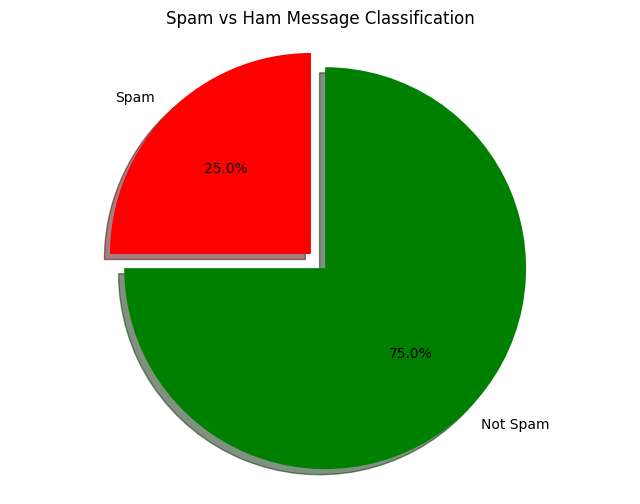

In [ ]:
# Predict for test messages and store results
predictions = [predict_spam(msg) for msg in test_messages]

#Pie chart to show the classification distribution
labels = ['Spam', 'Not Spam']
sizes = [predictions.count('Spam'), predictions.count('Not Spam')]
colors = ['red', 'green']
explode = (0.1, 0)  # "explode" the Spam section for emphasis

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Spam vs Ham Message Classification')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()
